<a href="https://colab.research.google.com/github/Ashish10Das/Deep_Learning/blob/main/EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles


In [3]:
X, y = make_circles(n_samples=100 , noise =0.1 ,  random_state=1)

In [7]:
df= pd.DataFrame(X, columns=['x','y'])
df['hue']=y

<Axes: xlabel='x', ylabel='y'>

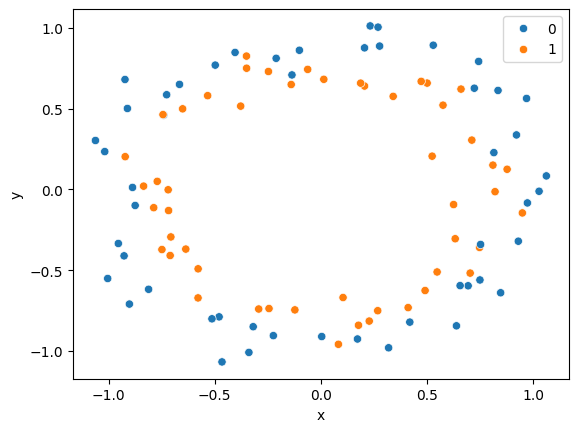

In [8]:
sns.scatterplot(x='x',y='y',hue=y, data =df)

In [9]:
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size =0.20 , random_state=2)

In [10]:
model = Sequential()
model.add(Dense(256,input_dim=2, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='binary_crossentropy',  optimizer ='adam')

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

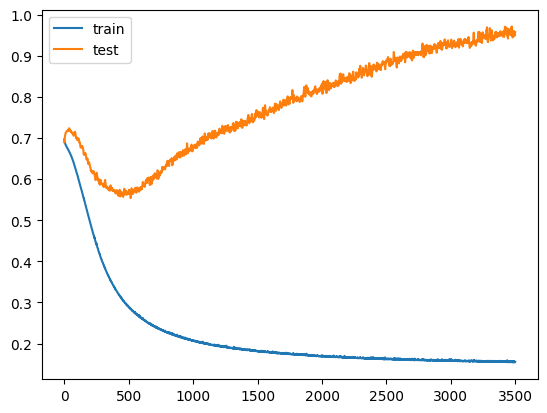

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'],label ='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


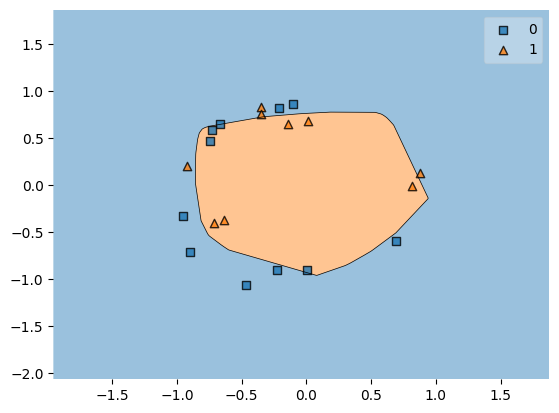

In [20]:
plot_decision_regions(X_test, y_test, clf=model)
plt.show()

**EARLY STOPPING** : This is to avoid overfitting which we are seeing in the above plot

In [21]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=30,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [35]:
history = model.fit(X_train, y_train , validation_data= (X_test, y_test), epochs = 3500,callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.5930 - loss: 0.6604 - val_accuracy: 0.4000 - val_loss: 0.7220
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6211 - loss: 0.6599 - val_accuracy: 0.4000 - val_loss: 0.7212
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6156 - loss: 0.6620 - val_accuracy: 0.4000 - val_loss: 0.7207
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6273 - loss: 0.6588 - val_accuracy: 0.4500 - val_loss: 0.7200
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6352 - loss: 0.6642 - val_accuracy: 0.4000 - val_loss: 0.7204
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6352 - loss: 0.6589 - val_accuracy: 0.4000 - val_loss: 0.7213
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6180 - loss: 0.6639 - val_accuracy: 0.4500 - val_loss: 0.7226
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6117 - loss: 0.6653 - val_accuracy: 0.4000 - 

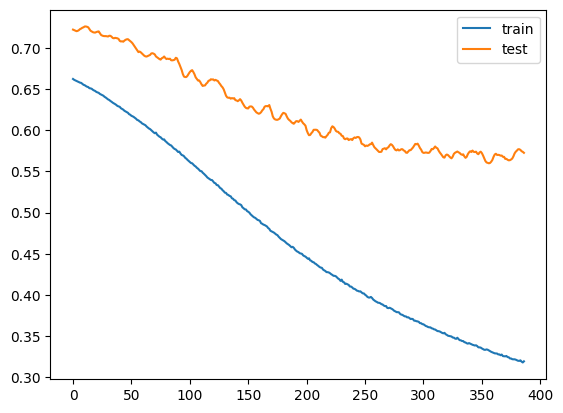

In [36]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'],label ='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


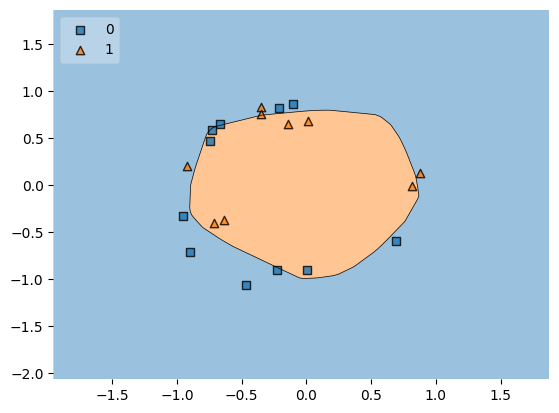

In [37]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()